In [1]:
%matplotlib inline
from __future__ import print_function # only necessary if using Python 2.x

import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy.misc
import cv2
from pyshtools.shclasses import SHCoeffs, SHWindow, SHGrid
from pyshtools.expand import MakeGridDH;

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0]
(64, 64)
(64, 64)
(64, 64)
(64, 64)
152


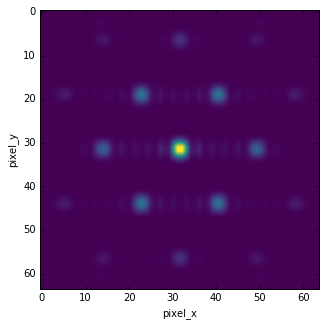

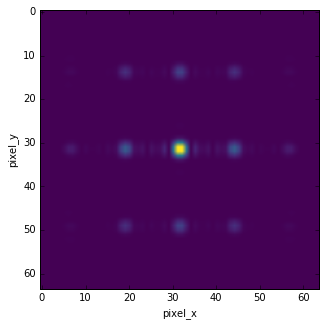

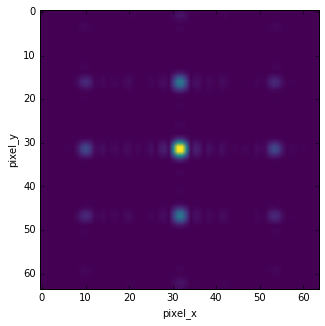

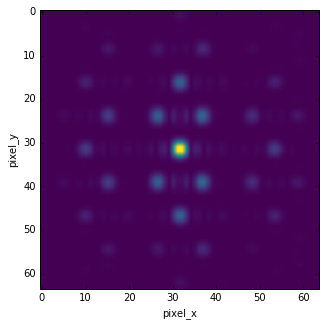

In [2]:
infile = ['/home/ziletti/Documents/calc_xray/rot_inv_3d/data_for_prototyping/Rnh_4DFTJQgTSOib4e4d-5GByiTVB_2d_kspace_angle45_supercell_by_nb_atoms_min32_max128/Pe39Hg2pODOJeogldQtTU_N02IHCa_0_0_45_op0_xray.png',
          '/home/ziletti/Documents/calc_xray/rot_inv_3d/data_for_prototyping/Rnh_4DFTJQgTSOib4e4d-5GByiTVB_2d_kspace_angle45_supercell_by_nb_atoms_min32_max128/PgtVvHpjQxlEn4yA0Ix_a0N0iPblR_0_0_45_op0_xray.png',
          '/home/ziletti/Documents/calc_xray/rot_inv_3d/data_for_prototyping/Rnh_4DFTJQgTSOib4e4d-5GByiTVB_2d_kspace_angle45_supercell_by_nb_atoms_min32_max128/Pw_HKmirUf9yi5uwTTRCrKMMgYdfi_0_0_45_op0_xray.png',
          '/home/ziletti/Documents/calc_xray/rot_inv_3d/data_for_prototyping/Rnh_4DFTJQgTSOib4e4d-5GByiTVB_2d_kspace_angle45_supercell_by_nb_atoms_min32_max128/PqH8FkEhs8VcWZurW-f8ZPFbxOcTf_0_0_45_op0_xray.png']

diff_imgs = []

angles = np.linspace(0, 360, 37).tolist()
#angles = np.linspace(10, 360, 1).tolist()

print(angles)
#angles = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]

for infile_ in infile:
    diff_img = scipy.misc.imread(infile_)
    print(diff_img.shape)
    diff_imgs.append(diff_img)
    # plot with matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(diff_img, cmap='viridis')
    ax.set(xlabel='pixel_x', ylabel='pixel_y');
    
    rows, cols = diff_img.shape
    for angle in angles:
        M = cv2.getRotationMatrix2D(((cols-1.0)/2.0,(rows-1.0)/2.0), angle,1)
        dst = cv2.warpAffine(diff_img, M,(cols,rows))
        diff_imgs.append(dst)
        ## plot with matplotlib
        #fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        #ax.imshow(dst, cmap='viridis')
        #ax.set(xlabel='pixel_x', ylabel='pixel_y');

print(len(diff_imgs))

In [3]:
from math import cos, sin

images = []
image_slice_ri_list = []
theta_slice_ri_list = []

# sample points
#r = np.linspace(0, max_r-1, max_r) # make bigger if you have huge images
max_r = 32
n_bins_r = 32
theta_bins = 1024
r = np.linspace(1.5, max_r-1, n_bins_r) # make bigger if you have huge images
theta = np.linspace(0, 2*np.pi, theta_bins) # make bigger if you have huge images

for diff_img in diff_imgs:
    image = diff_img.copy()
    images.append(image)
    
    rows, cols = image.shape
    # circle parameters 
    x0 = (rows-1.0)/2.0
    y0 = (cols-1.0)/2.0
    # image size
    max_x = 63
    max_y = 63
    assert max_x == max_y

    xy_r = []
    # the pixels that get hit
    for r_i in r:
        coord = zip(np.rint(r_i*np.cos(theta) + x0).astype(int), np.rint(r_i*np.sin(theta) + y0).astype(int))
        xy = list(set([xy for xy in coord if
                   xy[0] >= 0 and xy[0] < max_x and xy[1] >= 0 and xy[1] < max_y]))
        xy_r.append(xy)

    #print(len(xy))
    #print(len(xy_r))
    image_slice_ri = []
    theta_slice_ri = []
    
    for idx, xy_ri in enumerate(xy_r): 
        image_slice = np.zeros((rows, cols))
        theta_slice = []
        #theta_slice = np.zeros(theta_bins)
        for item in xy_r[idx]:
            image_slice[item[0], item[1]] = image[item[0], item[1]]
        
            theta_sel = m.degrees(m.atan2(item[0]-x0, item[1]-y0))
            theta_sel_val = image[item[0], item[1]]
            theta_slice.append((theta_sel, theta_sel_val))            
            #break
            
        theta_slice_ri.append(theta_slice)    
        image_slice_ri.append(image_slice)

        #image_slice[item[0], item[1]] = image[item[0], item[1]]
            #image_slice_ri.append(image_slice)
            
    image_slice_ri_list.append(image_slice_ri)
    theta_slice_ri_list.append(theta_slice_ri)

(152, 32, 64, 64)
(152, 32)


/home/ziletti/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


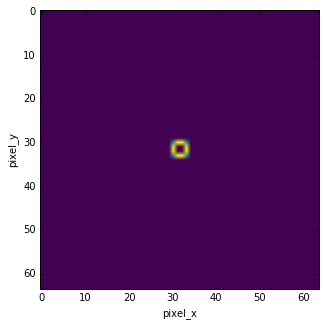

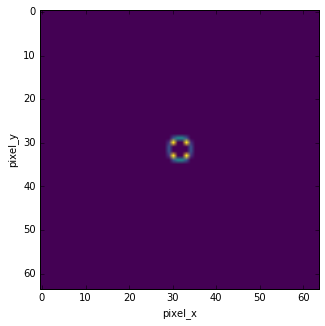

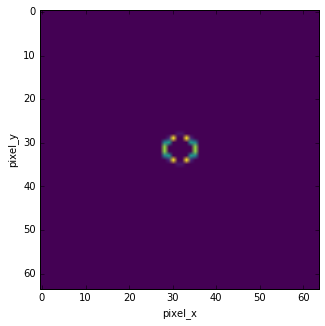

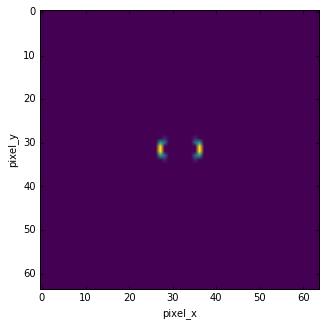

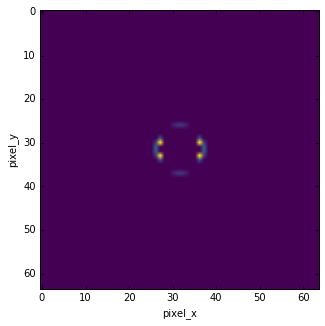

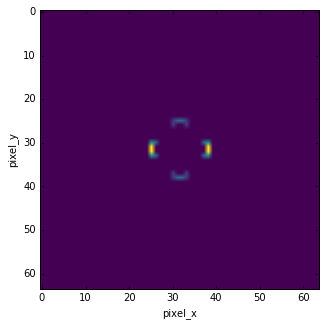

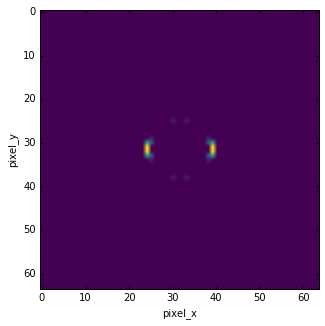

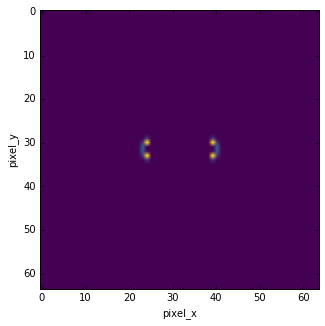

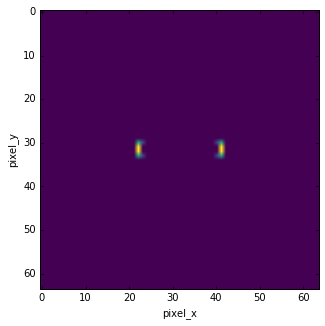

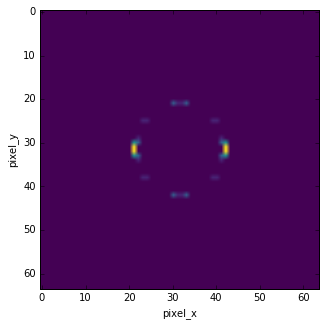

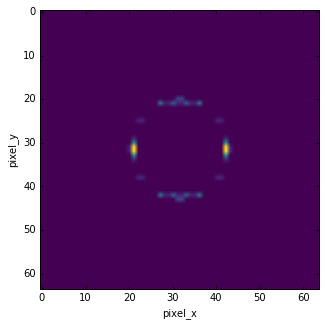

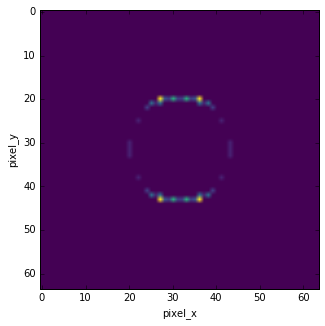

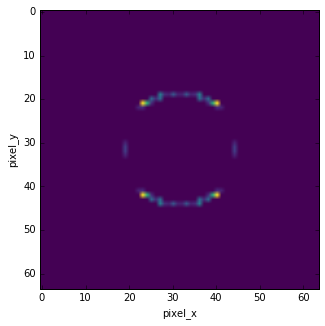

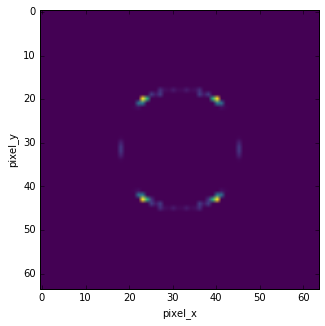

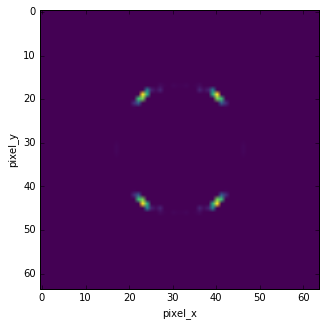

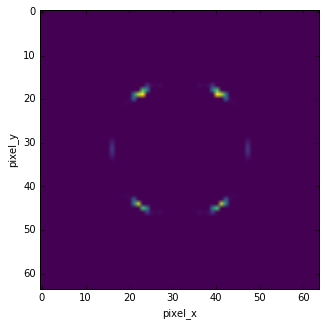

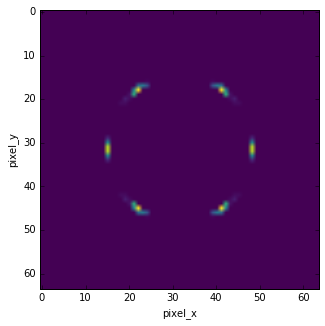

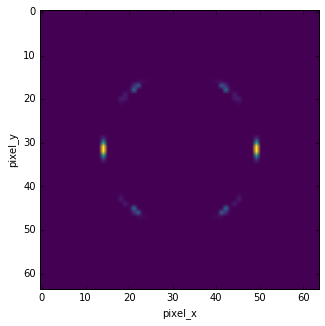

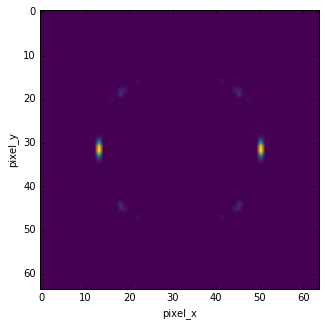

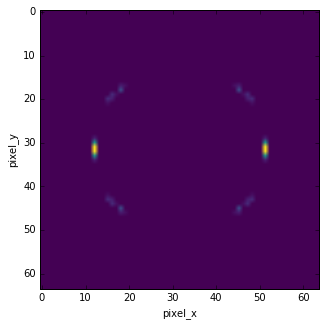

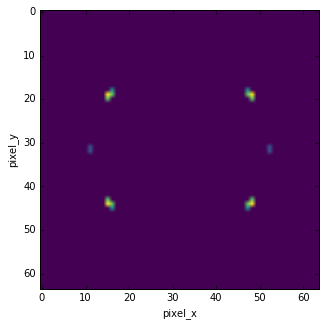

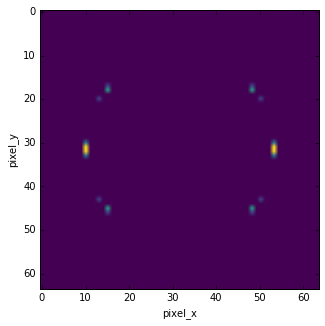

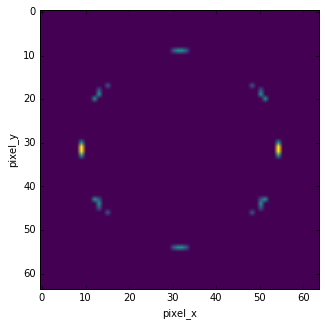

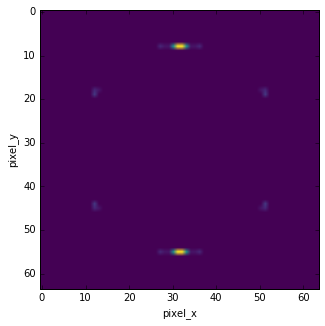

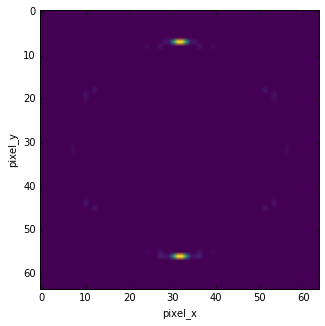

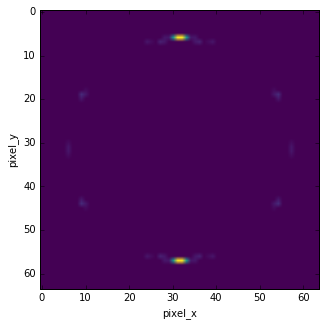

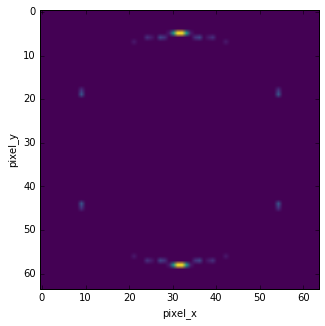

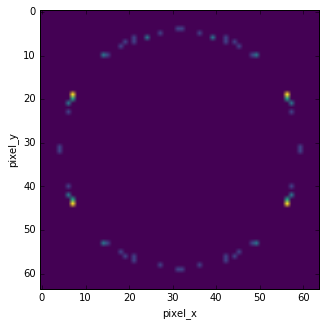

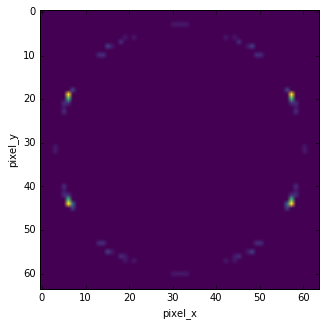

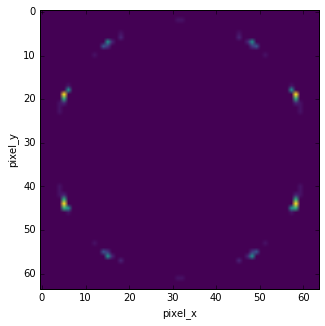

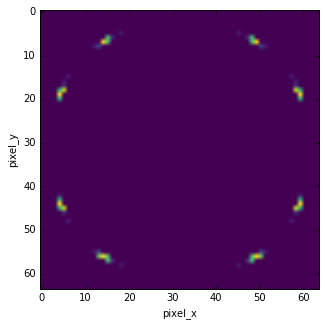

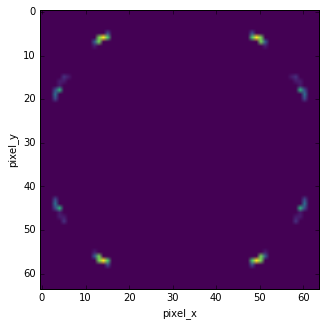

In [11]:
image_by_slices = np.asarray(image_slice_ri_list)
theta_by_slices = np.asarray(theta_slice_ri_list)
print(image_by_slices.shape)
print(theta_by_slices.shape)

# plot theta slices
#for idx, item in enumerate(theta_by_slices.tolist()):
#    for theta_slice_ri in theta_by_slices[idx].tolist():
#        theta, intensity = zip(*theta_slice_ri)
#        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#        ax.scatter(theta, intensity, marker=".")#, interpolation="None")
#        ax.set_xlim([-180.0, 180.0])
#        ax.set_ylim([0, 255])
#        ax.set(xlabel='theta', ylabel='Intensity');
#    break
    
# plot image slices
#for idx, image in enumerate(image_by_slices.tolist()):
#    for image_slice_ri in image_by_slices[idx].tolist():
#        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#        ax.imshow(image_slice_ri, cmap='viridis')#, interpolation="None")
#        ax.set(xlabel='pixel_x', ylabel='pixel_y');
#    break
 


In [5]:
from pyshtools.expand import SHExpandDH;
from pyshtools.spectralanalysis import spectrum

print(image_by_slices.shape)

coeffs_list = []
nl_list = []
ls_list = []

for idx_img in range(image_by_slices.shape[0]):
    for idx_slice in range(image_by_slices.shape[1]):
        #print(image_by_slices[idx_img, idx_slice].shape) 
        coeffs = SHExpandDH(image_by_slices[idx_img, idx_slice], sampling=1)
        nl = coeffs.shape[1]
        ls = np.arange(nl)
        coeffs_list.append(coeffs)
        nl_list.append(nl)
        ls_list.append(ls)
        
coeffs = np.asarray(coeffs_list).reshape(image_by_slices.shape[0], image_by_slices.shape[1], coeffs.shape[0], coeffs.shape[1], coeffs.shape[2])
print(coeffs.shape)

(152, 32, 64, 64)
(152, 32, 2, 32, 32)


In [6]:
#help(SHCoeffs)

In [ ]:
sh_coeffs_list = []

show=False

for idx_img in range(coeffs.shape[0]):
    for idx_slice in range(coeffs.shape[1]):
        #print(idx_img, idx_slice)
        sh_coeffs = SHCoeffs.from_array(coeffs[idx_img, idx_slice])
        
        if show:
            topo_filtered = MakeGridDH(sh_coeffs.to_array(), sampling=1)
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
            ax.imshow(topo_filtered, extent=(-180, 180, -90, 90), cmap='viridis')
            grid = sh_coeffs.expand()
            fig, ax = grid.plot()
        sh_coeffs_list.append(sh_coeffs)
        #print(sh_coeffs.info())
    

sh_spectrum_list = []
for sh_coeff in sh_coeffs_list:
    sh_spectrum = sh_coeff.spectrum(convention='l2norm')
    sh_spectrum_list.append(sh_spectrum)

sh_spectra = np.asarray(sh_spectrum_list).reshape(coeffs.shape[0], coeffs.shape[1], -1)
print(sh_spectra.shape)


#for idx_img in range(sh_coeffs.shape[0]):
#    print(sh_coeffs[idx_img].spectrum(convention='l2norm'))
    #l2norm

    
    #fig, ax = sh_coeffs.plot_spectrum(convention='l2norm')
    #fig, ax = sh_coeffs.plot_spectrum(convention='power')
    #fig, ax = sh_coeffs.plot_spectrum(convention='energy')

#    fig, ax = sh_coeffs.plot_spectrum2d()
#    grid_lm = sh_coeffs.expand('DH2')
#    fig, ax = grid_lm.plot()

In [8]:
from matplotlib.pyplot import figure
from numpy import amin, amax, ravel

def make_multiple_image_plot(data, cmap='hot', image_number=0, n_cols=6, vmin=None, vmax=None):

    fig = figure()
    #cmap = cm.gray
    #cmap = cm.hot
    #cmap = cm.nipy_spectral
    
    figtitle=""
    t = fig.text(0.1, 0.95, figtitle,
             horizontalalignment='center')
        
    ax = []
    images = []
    #vmin = 1e40
    #vmax = -1e40
        
    # get only one sample
    num_filter = data.shape[0]
    if num_filter % n_cols == 0:
        n_rows = num_filter / n_cols
    else:
        n_rows = num_filter / n_cols + 1
  
    w = 1.0/n_cols
    #w=0.4
    h = 1.0/n_rows  
    
    print(n_cols, n_rows)
    print('output.shape', data.shape)
    idx_filter=0
    for i in range(n_rows):
        for j in range(n_cols):
            if idx_filter < data.shape[0]:
                pos = [0.075 + j*1.0*w, 0.18 + i*1.2*h, w, h]
                a = fig.add_axes(pos)
                if i > 0:
                    a.set_xticklabels([])
                data_filter = data[idx_filter, :, :]

                #data_filter = data_filter.reshape(data_filter.shape[1], data_filter.shape[2])
                #print('data shape in plot', data_filter.shape)

                #data_ = data[0, idx_img, :, :]
                #print 'data shape after slice in plot', data_.shape
                #data_ = data_.reshape(data_.shape[1], data_.shape[2])
                #data_ = ((1 + i + j)/10.0)*rand(10, 20)*1e-6
                #print data_.shape
                dd = ravel(data_filter)
                # Manually find the min and max of all colors for
                # use in setting the color scale.
                vmin = min(vmin, amin(dd))
                #make sure vmin is positive or zero
                vmin = max(0.0, vmin)
                
                #vmax = max(vmax, amax(dd))
        
                images.append(a.imshow(data_filter, cmap=cmap, vmin=vmin, vmax=vmax, 
                    aspect='auto'))
                #interpolation="None"
                # do not show axis
                plt.axis('off')
            
                ax.append(a)
                
                idx_filter += 1

    
    #axes(ax[0])     # Return the current axes to the first one,
    #sci(images[0])  # because the current image must be in current axes.
    
    #show()

38 4
output.shape (152, 32, 32)


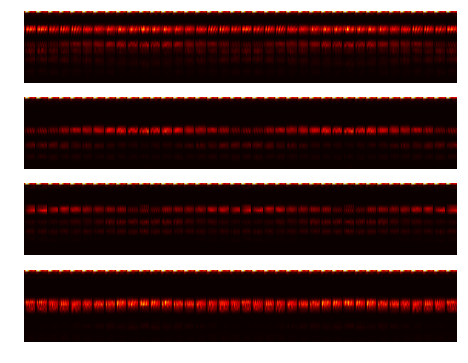

In [9]:
#fig = plt.figure()

make_multiple_image_plot(sh_spectra, cmap='hot', image_number=0, n_cols=len(angles)+1, vmax=None)


In [10]:
#sh_coeffs_list = []

#for coeffs in coeffs_list:
#    sh_coeffs = SHCoeffs.from_array(coeffs)
#    sh_coeffs_list.append(sh_coeffs)
    #print(sh_coeffs.info())
    
#for sh_coeffs in sh_coeffs_list:
#    print(sh_coeffs.spectrum(convention='l2norm'))
    #l2norm
    
    #fig, ax = sh_coeffs.plot_spectrum(convention='l2norm')
    #fig, ax = sh_coeffs.plot_spectrum(convention='power')
    #fig, ax = sh_coeffs.plot_spectrum(convention='energy')

    #fig, ax = sh_coeffs.plot_spectrum2d()
    #grid_lm = sh_coeffs.expand('DH2')
    #fig, ax = grid_lm.plot()